In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lazio"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,12,Lazio,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,50.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,12,Lazio,0,0,0,0,0,-2,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-100.00,-100.00
2,2020-02-27T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,428.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,59.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,12,Lazio,3,0,3,0,3,3,3,...,0.0,68.0,0.0,0.0,0.00,100.00,4.41,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2021-01-05T17:00:00,12,Lazio,2869,308,3177,74131,77308,231,1719,...,72.0,13132.0,6789.0,224.0,9.69,4.11,13.09,25.32,-3.14,0.30
316,2021-01-06T17:00:00,12,Lazio,2843,306,3149,74617,77766,458,2007,...,37.0,15417.0,6341.0,486.0,9.72,4.05,13.02,31.65,-0.65,0.59
317,2021-01-07T17:00:00,12,Lazio,2882,310,3192,74731,77923,157,1779,...,43.0,12339.0,5970.0,114.0,9.71,4.10,14.42,29.80,1.31,0.20
318,2021-01-08T17:00:00,12,Lazio,2871,309,3180,74675,77855,-68,1613,...,45.0,12614.0,4751.0,-56.0,9.72,4.08,12.79,33.95,-0.32,-0.09


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1543
Nuovi tamponi: 11982.0
Percentuale nuovi positivi/nuovi tamponi: 12.9 %
Nuovi guariti: 1175.0
Nuovi deceduti: 54.0
Variazione positivi ricoverati con sintomi: -47.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: 360.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,12,Lazio,2785,257,3042,52547,55589,2315,2608,...,36.0,29315.0,24224.0,2271.0,8.45,5.47,8.90,10.77,8.44,4.35
1,2020-11-11T17:00:00,12,Lazio,2913,255,3168,54415,57583,1994,2479,...,38.0,26554.0,22127.0,1868.0,8.05,5.50,9.34,11.20,-0.78,3.59
2,2020-11-12T17:00:00,12,Lazio,2953,259,3212,56707,59919,2336,2686,...,49.0,29119.0,21816.0,2292.0,8.06,5.36,9.22,12.31,1.57,4.06
3,2020-11-13T17:00:00,12,Lazio,3018,260,3278,59121,62399,2480,2925,...,34.0,28309.0,21816.0,2414.0,7.93,5.25,10.33,13.41,0.39,4.14
4,2020-11-14T17:00:00,12,Lazio,3076,273,3349,61609,64958,2559,2997,...,39.0,29822.0,24696.0,2488.0,8.15,5.16,10.05,12.14,5.00,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-05T17:00:00,12,Lazio,2869,308,3177,74131,77308,231,1719,...,72.0,13132.0,6789.0,224.0,9.69,4.11,13.09,25.32,-3.14,0.30
57,2021-01-06T17:00:00,12,Lazio,2843,306,3149,74617,77766,458,2007,...,37.0,15417.0,6341.0,486.0,9.72,4.05,13.02,31.65,-0.65,0.59
58,2021-01-07T17:00:00,12,Lazio,2882,310,3192,74731,77923,157,1779,...,43.0,12339.0,5970.0,114.0,9.71,4.10,14.42,29.80,1.31,0.20
59,2021-01-08T17:00:00,12,Lazio,2871,309,3180,74675,77855,-68,1613,...,45.0,12614.0,4751.0,-56.0,9.72,4.08,12.79,33.95,-0.32,-0.09


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

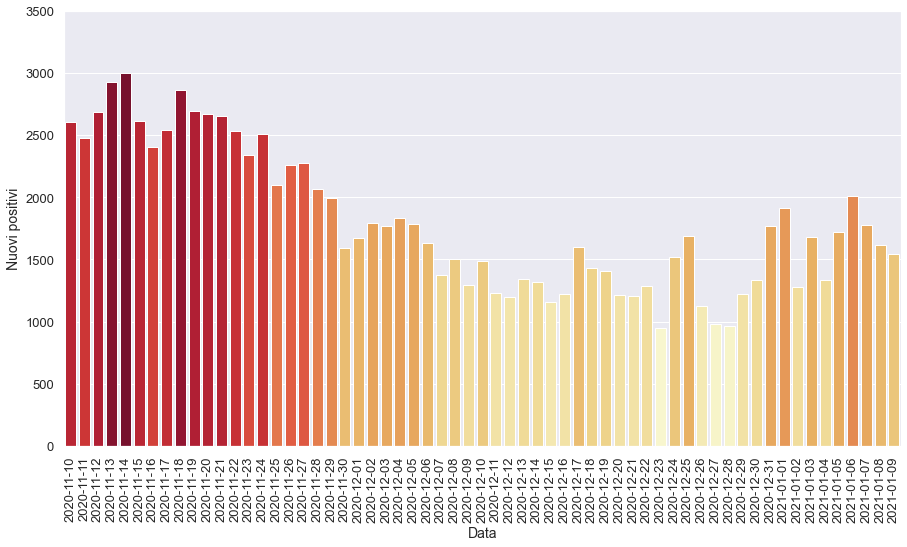

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

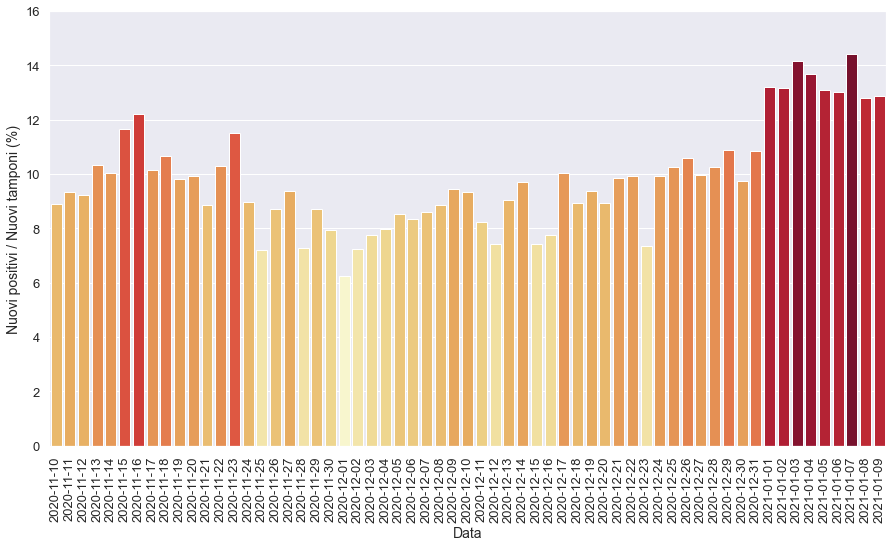

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

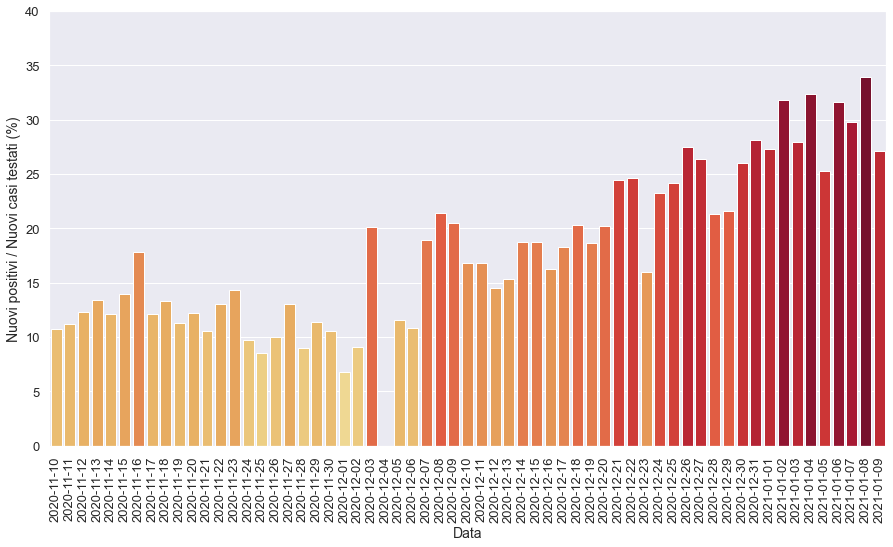

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

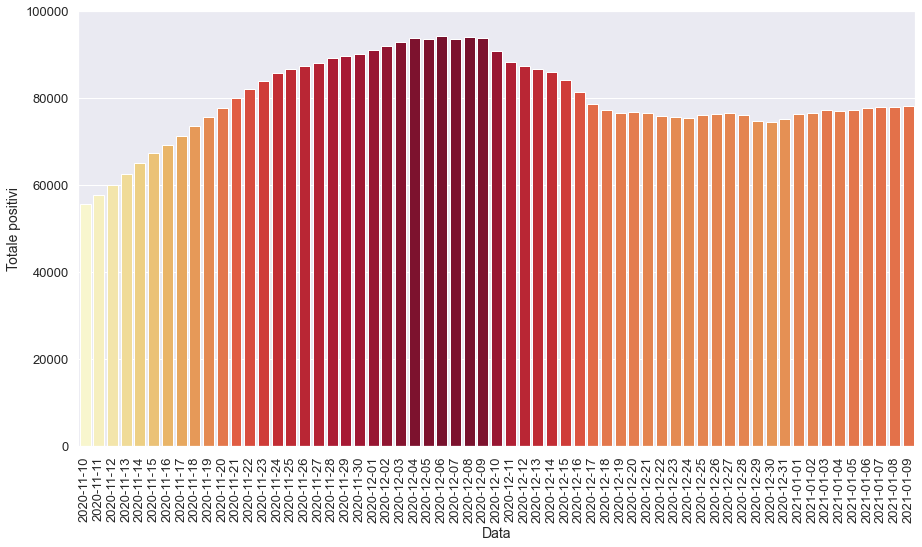

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

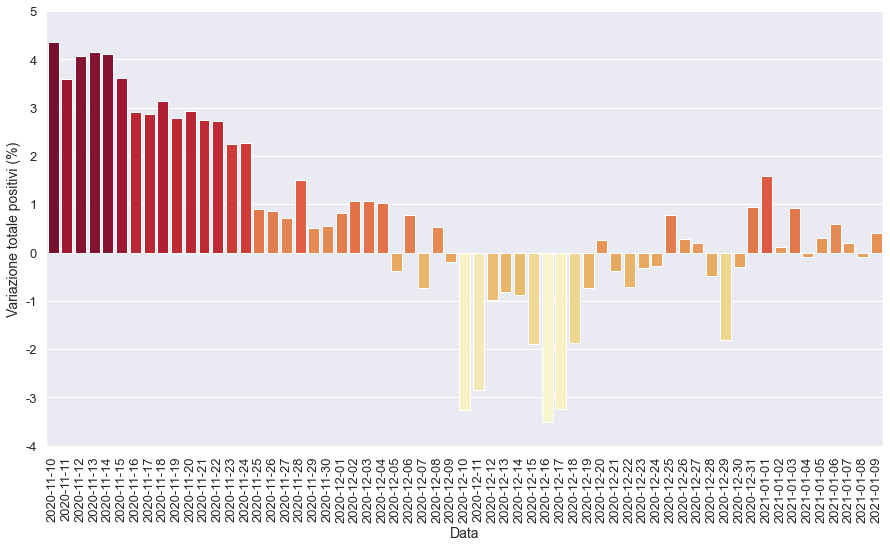

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

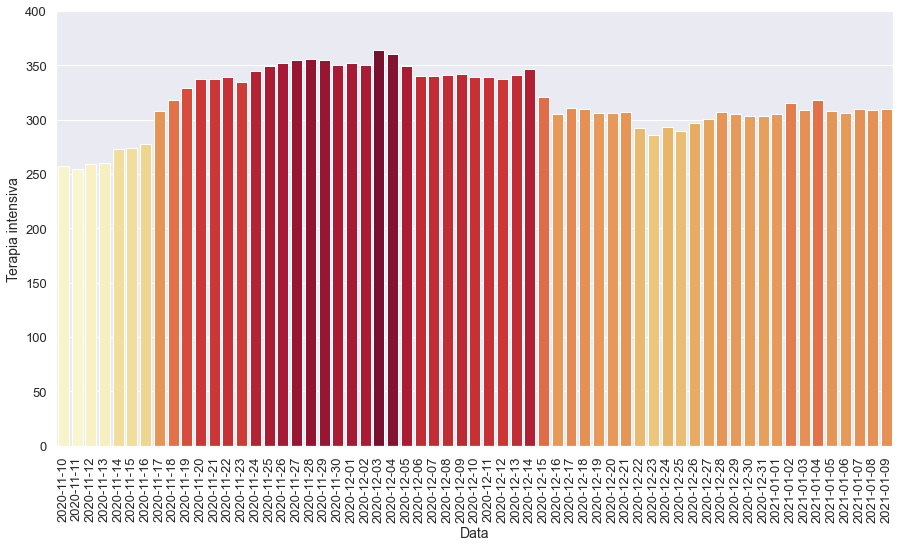

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

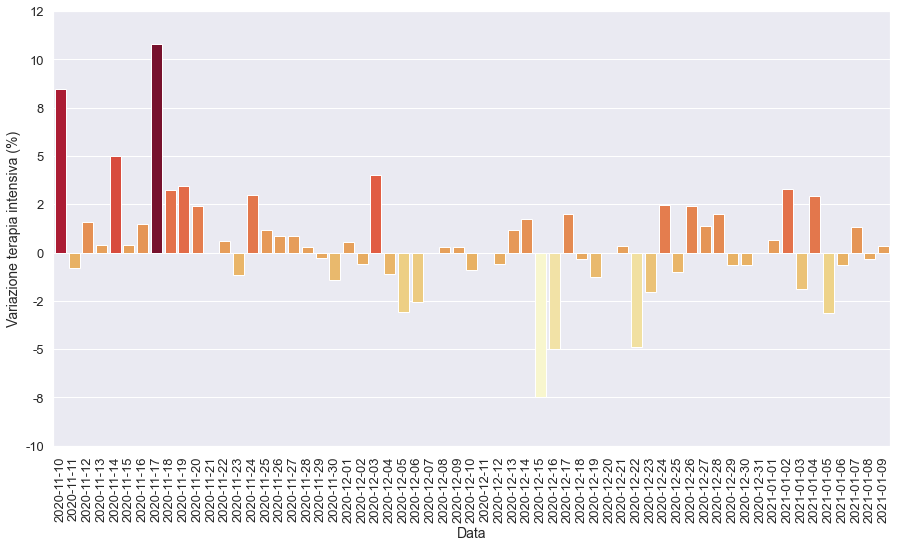

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

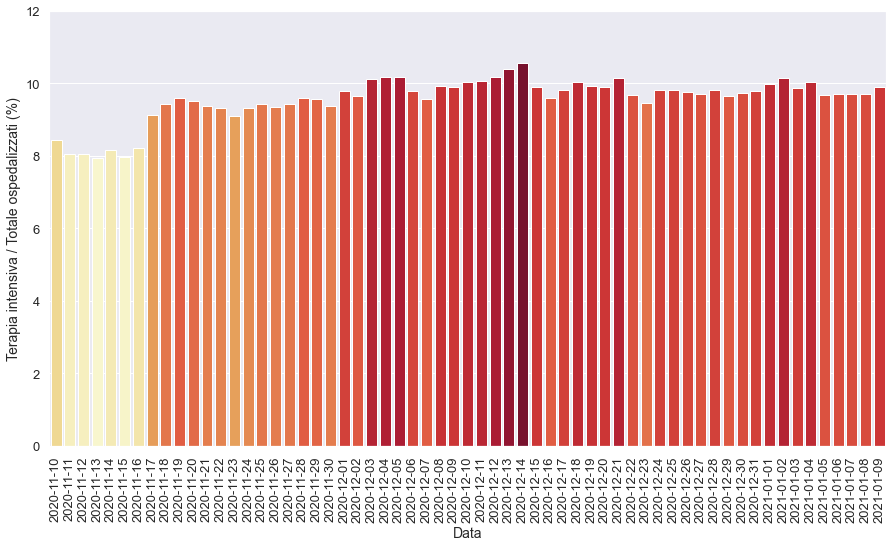

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

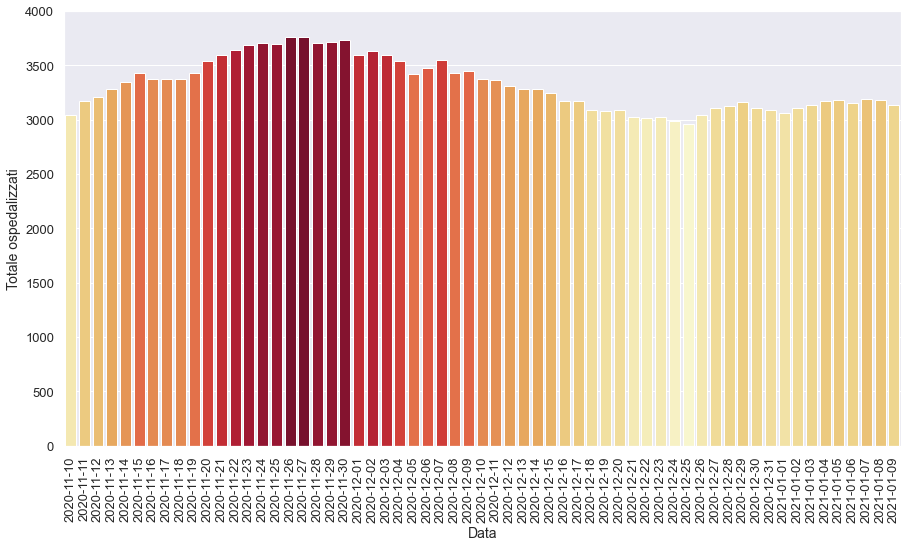

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

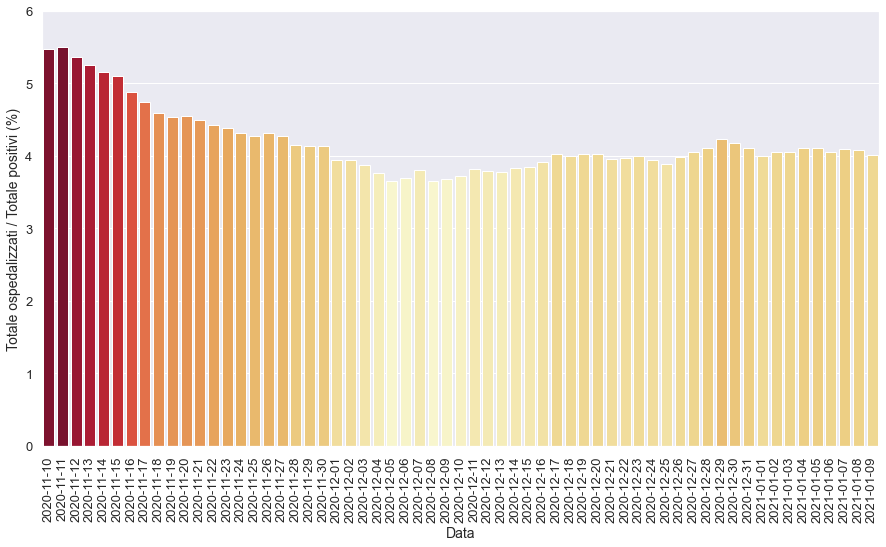

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

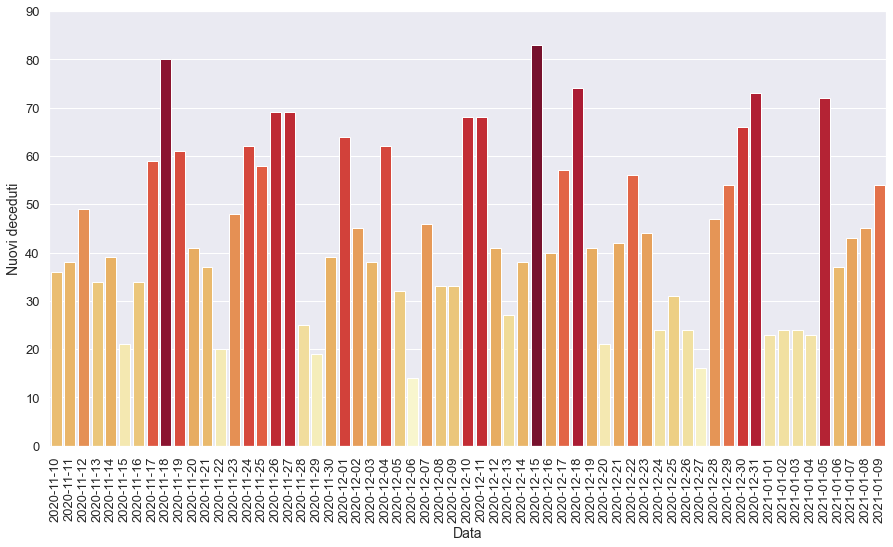

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

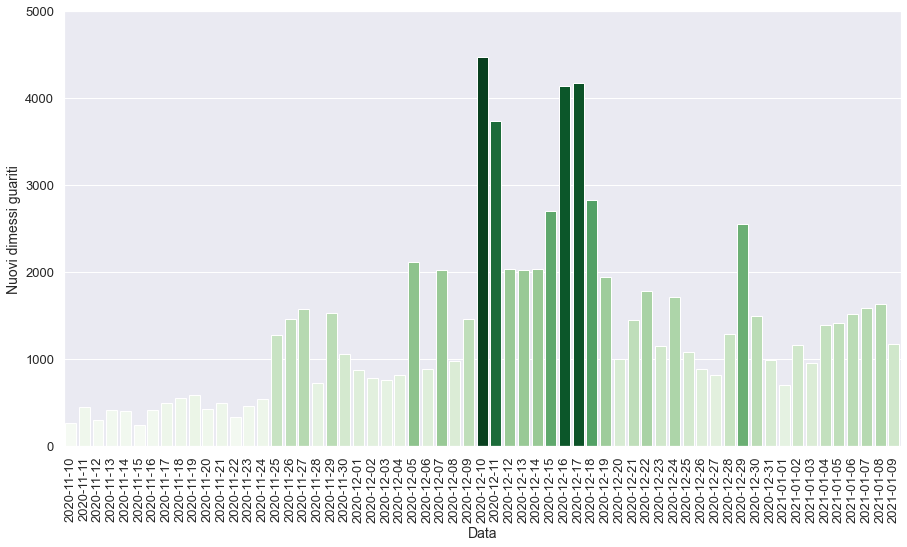

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-10T17:00:00,12,Lazio,3036,339,3375,87392,90767,-3051,1488,...,68.0,15916.0,8874.0,-2975.0,10.04,3.72,9.35,16.77,-0.88,-3.25
1,2020-12-11T17:00:00,12,Lazio,3026,339,3365,84828,88193,-2574,1230,...,68.0,14917.0,7330.0,-2564.0,10.07,3.82,8.25,16.78,0.00,-2.84
2,2020-12-12T17:00:00,12,Lazio,2969,337,3306,84012,87318,-875,1194,...,41.0,16086.0,8224.0,-816.0,10.19,3.79,7.42,14.52,-0.59,-0.99
3,2020-12-13T17:00:00,12,Lazio,2937,341,3278,83331,86609,-709,1339,...,27.0,14815.0,8735.0,-681.0,10.40,3.78,9.04,15.33,1.19,-0.81
4,2020-12-14T17:00:00,12,Lazio,2938,347,3285,82564,85849,-760,1315,...,38.0,13565.0,7000.0,-767.0,10.56,3.83,9.69,18.79,1.76,-0.88
5,2020-12-15T17:00:00,12,Lazio,2921,321,3242,80979,84221,-1628,1159,...,83.0,15612.0,6185.0,-1585.0,9.90,3.85,7.42,18.74,-7.49,-1.90
6,2020-12-16T17:00:00,12,Lazio,2869,305,3174,78093,81267,-2954,1220,...,40.0,15705.0,7516.0,-2886.0,9.61,3.91,7.77,16.23,-4.98,-3.51
7,2020-12-17T17:00:00,12,Lazio,2860,311,3171,75459,78630,-2637,1597,...,57.0,15906.0,8732.0,-2634.0,9.81,4.03,10.04,18.29,1.97,-3.24
8,2020-12-18T17:00:00,12,Lazio,2780,310,3090,74069,77159,-1471,1428,...,74.0,15984.0,7045.0,-1390.0,10.03,4.00,8.93,20.27,-0.32,-1.87
9,2020-12-19T17:00:00,12,Lazio,2773,306,3079,73510,76589,-570,1410,...,41.0,15052.0,7569.0,-559.0,9.94,4.02,9.37,18.63,-1.29,-0.74


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

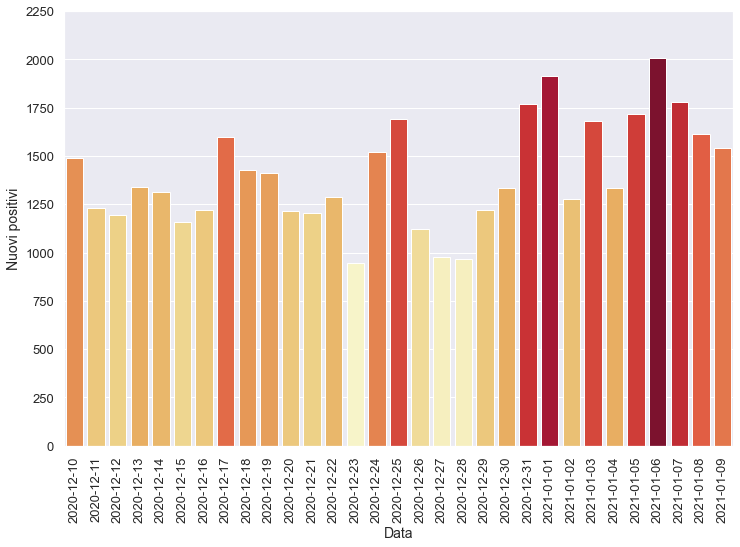

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

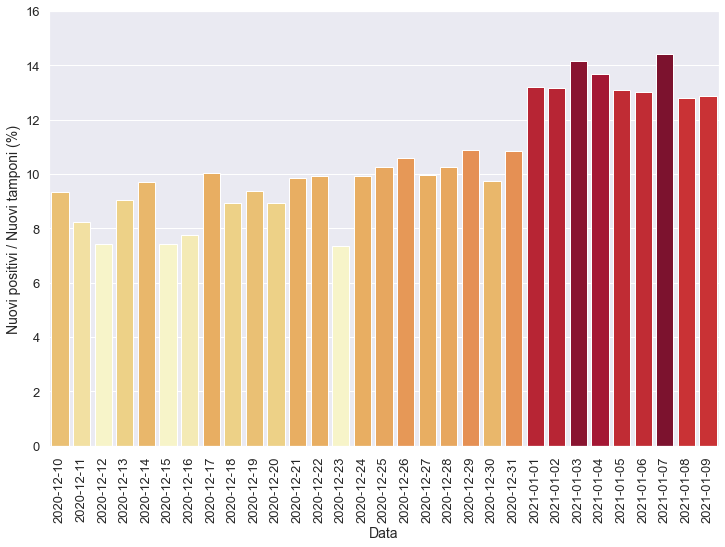

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

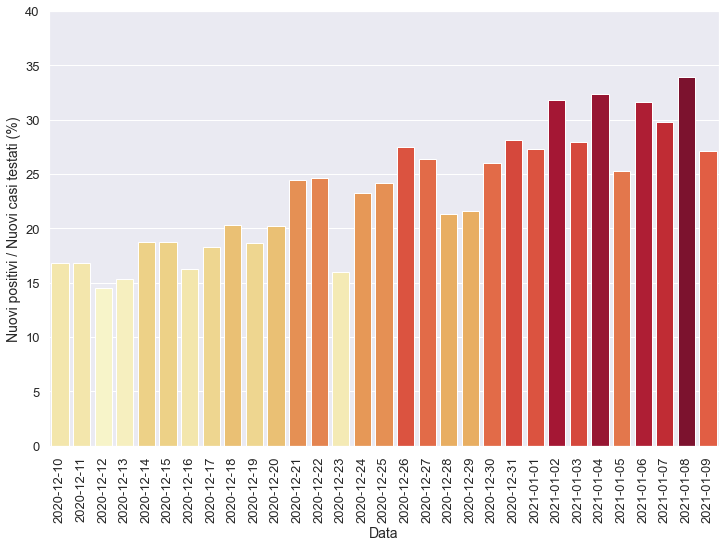

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

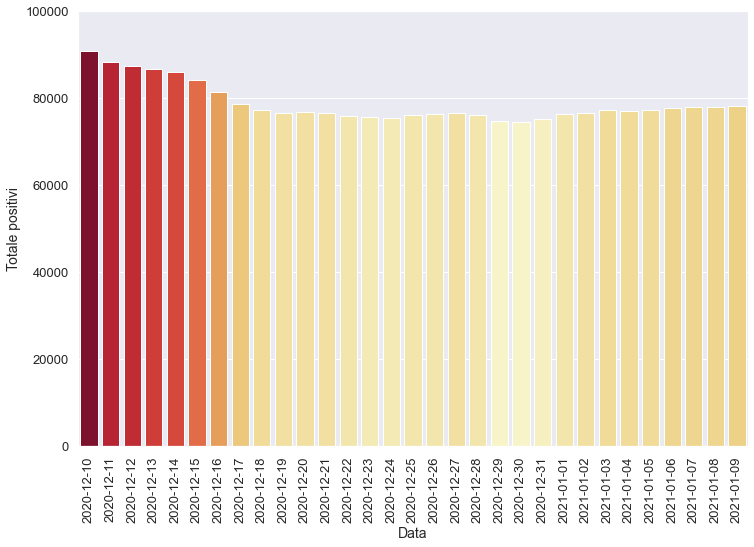

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

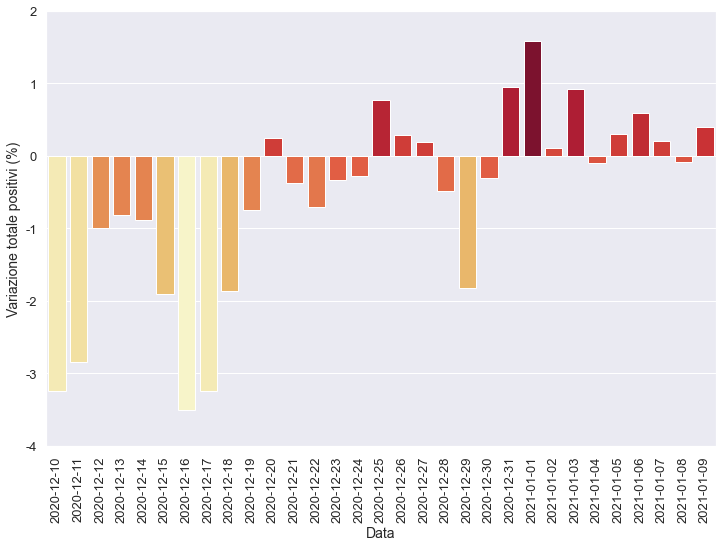

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

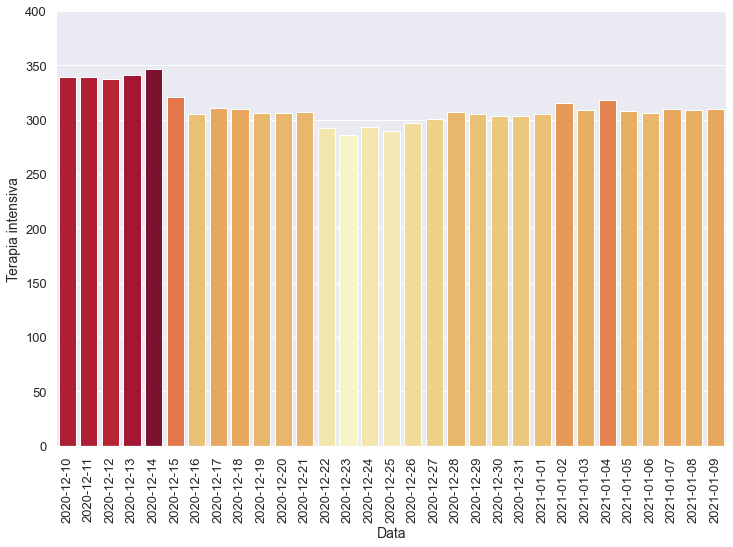

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

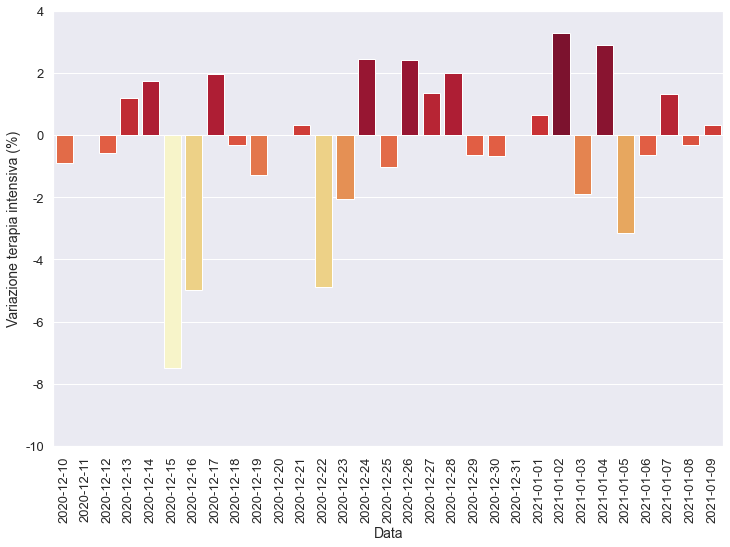

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

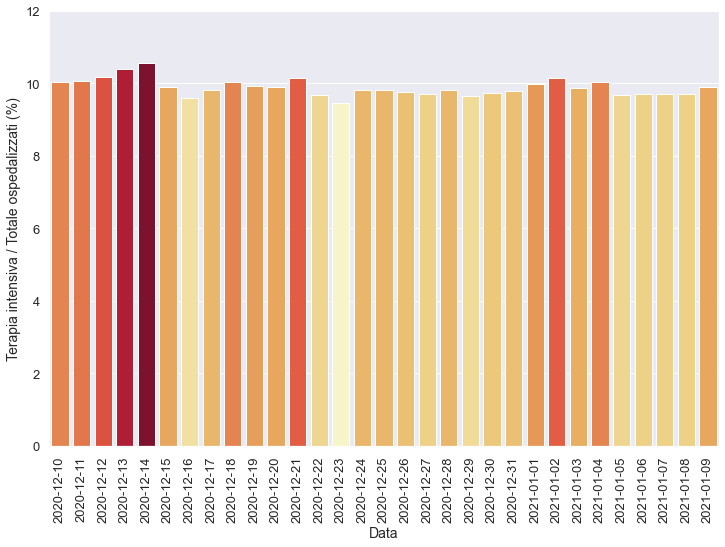

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

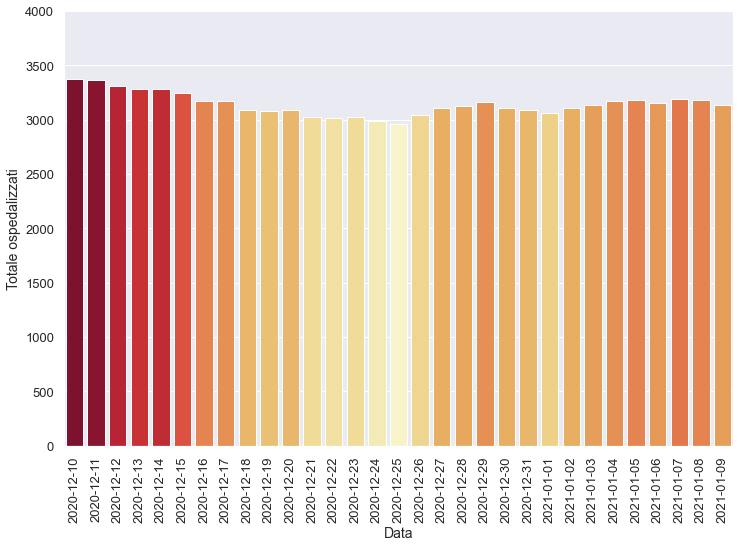

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

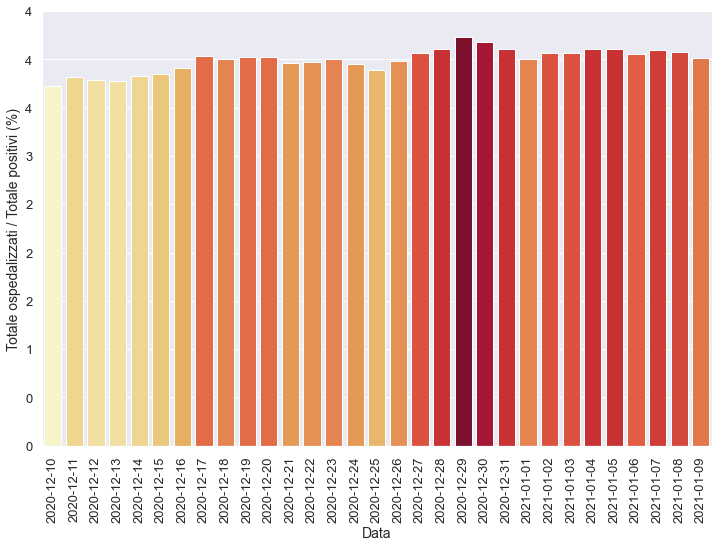

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

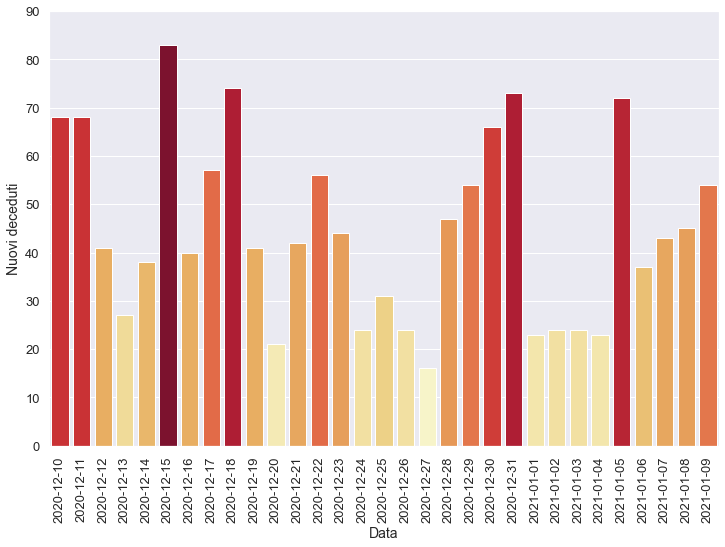

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

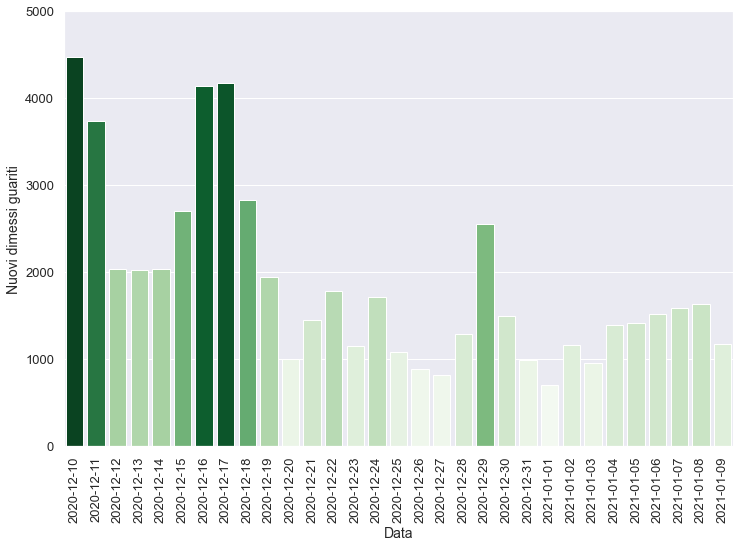

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-02T17:00:00,12,Lazio,2792,315,3107,73341,76448,87,1275,...,24.0,9686.0,4004.0,37.0,10.14,4.06,13.16,31.84,3.28,0.11
1,2021-01-03T17:00:00,12,Lazio,2824,309,3133,74020,77153,705,1681,...,24.0,11892.0,6015.0,679.0,9.86,4.06,14.14,27.95,-1.90,0.92
2,2021-01-04T17:00:00,12,Lazio,2852,318,3170,73907,77077,-76,1334,...,23.0,9759.0,4123.0,-113.0,10.03,4.11,13.67,32.36,2.91,-0.10
3,2021-01-05T17:00:00,12,Lazio,2869,308,3177,74131,77308,231,1719,...,72.0,13132.0,6789.0,224.0,9.69,4.11,13.09,25.32,-3.14,0.30
4,2021-01-06T17:00:00,12,Lazio,2843,306,3149,74617,77766,458,2007,...,37.0,15417.0,6341.0,486.0,9.72,4.05,13.02,31.65,-0.65,0.59
5,2021-01-07T17:00:00,12,Lazio,2882,310,3192,74731,77923,157,1779,...,43.0,12339.0,5970.0,114.0,9.71,4.10,14.42,29.80,1.31,0.20
6,2021-01-08T17:00:00,12,Lazio,2871,309,3180,74675,77855,-68,1613,...,45.0,12614.0,4751.0,-56.0,9.72,4.08,12.79,33.95,-0.32,-0.09
7,2021-01-09T17:00:00,12,Lazio,2824,310,3134,75035,78169,314,1543,...,54.0,11982.0,5688.0,360.0,9.89,4.01,12.88,27.13,0.32,0.40


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

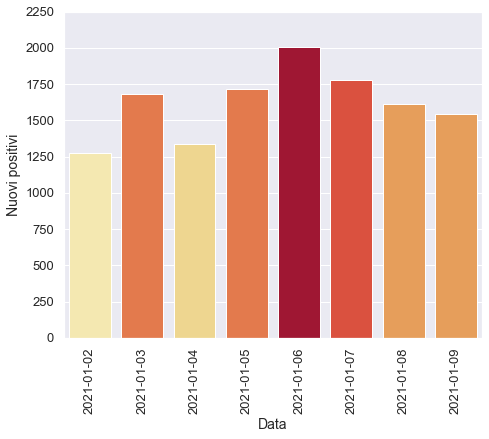

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

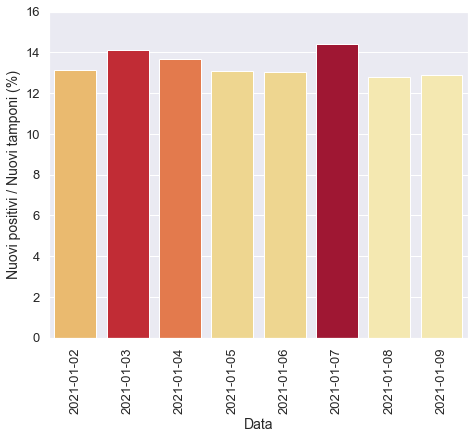

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

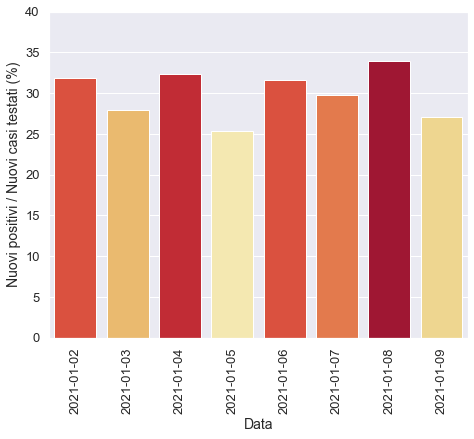

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

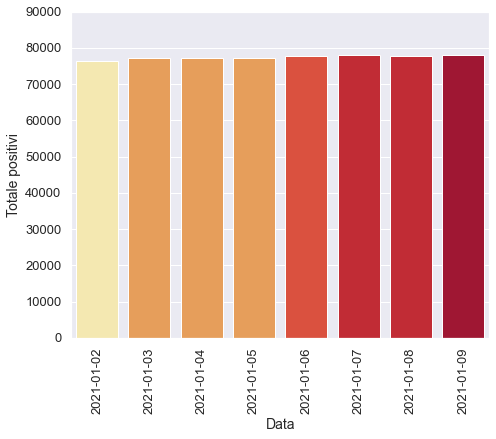

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

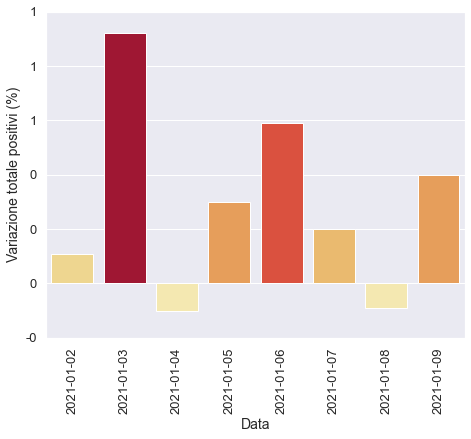

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

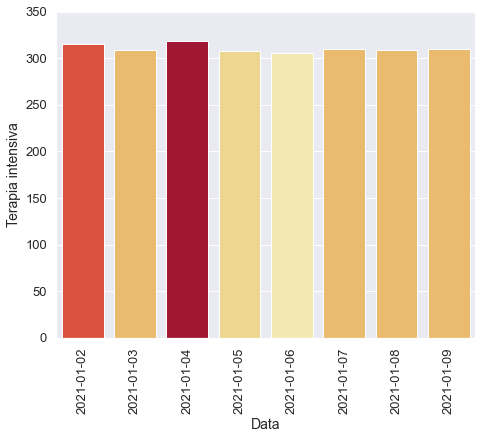

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

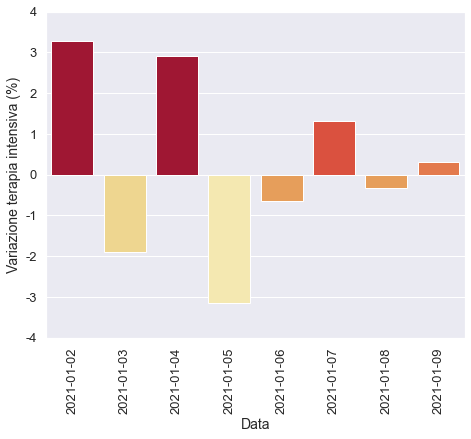

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

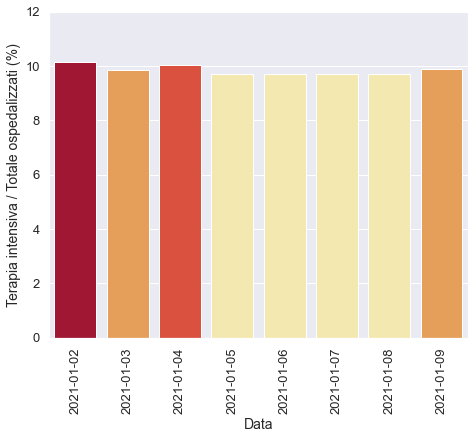

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

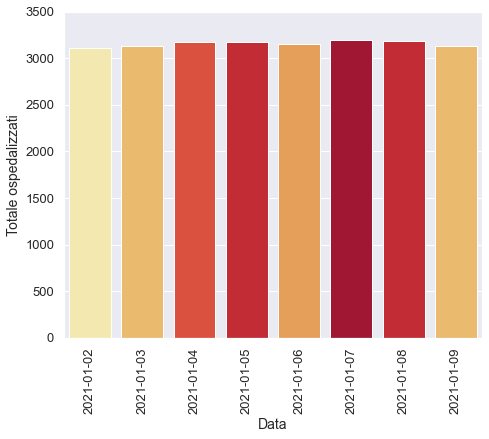

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

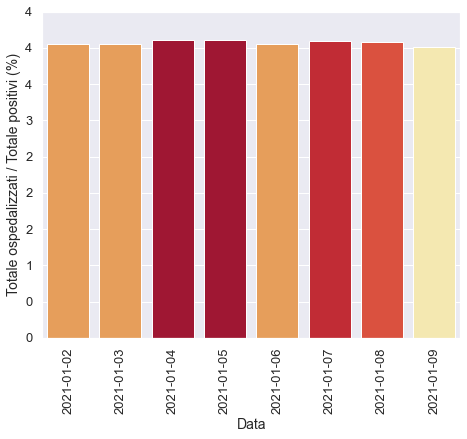

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

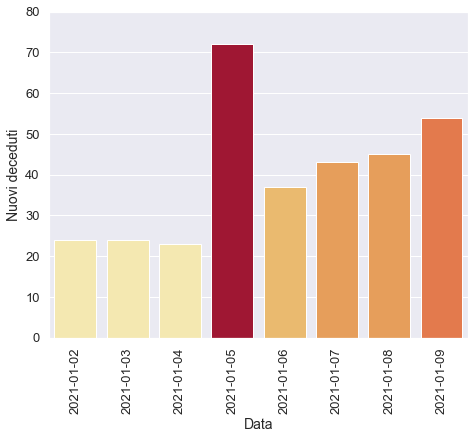

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

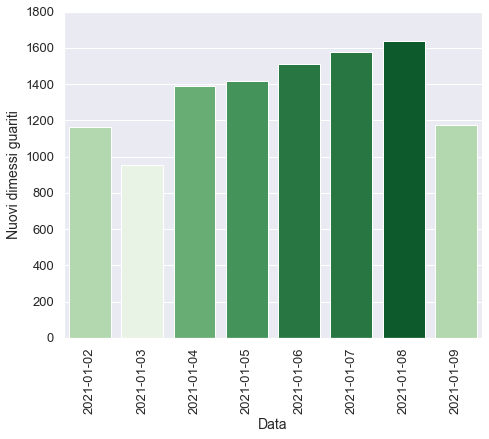

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)